08-13-20 <br>
Cal Craven <br>
Take the center of mass xyz files created, and calculate neighbor statistics. 
Use these statistics to determine Phase. Output a CSV of finalized data <br>
1. Read in data from a single directory <br>
2. Calculate coordination number for a single system <br>
3. Calculate Average coord number for each system <br>
4. Read in statepoints from tnp simulation <br> 
5. Identify Resultant Phases <br>
6. Save coordination numbers, sasa, radius of gyration, asphericity, 
    statepoints, and phases to a data frame <br>

In [1]:
import numpy as np
import freud
import matplotlib.pyplot as plt
import pandas
from readtraj import *
from collections import Counter
from plotting import *

# Section 1: Read in COM trajectory data from single xyz files in workspace

Only Read in one of these to plot the rdfs in section 2

In [2]:
index=0
scale=0.395
box_length=101.26605*scale
file_path = '../trajectories/bulk/workspace/'
data0=XYZ_To_NParray(file_path + "dea8e7530829b904bb8fd49b668bbf71/COG.xyz")*scale 
data1 = XYZ_To_NParray(file_path + '5e5469e3ad539a2a44caffb514c3a1b0/COG.xyz')*scale
data2 = XYZ_To_NParray(file_path + '7ca78ebf9f2907ea04f44bb7b19bc127/COG.xyz')*scale

In [3]:
index=1
scale=0.395
box_length=101.26605*scale
data0=XYZ_To_NParray(file_path + "e7ab55455186f19e3bc0421bda362bac/COG.xyz")*scale 
data1 = XYZ_To_NParray(file_path + 'c45084290ee1a7f1a761b78aca0f21c1/COG.xyz')*scale
data2 = XYZ_To_NParray(file_path + '78cfaea4bd511bd0d0f48dbdb39b0b3a/COG.xyz')*scale

In [4]:
index=2
scale=0.395
box_length=101.26605*scale
data0=XYZ_To_NParray(file_path + "1bb21ced4538fec0a1744ab973600ca0/COG.xyz")*scale 
data1 = XYZ_To_NParray(file_path + '88654cf966042dfcd059a45527c3fe8b/COG.xyz')*scale
data2 = XYZ_To_NParray(file_path + 'ef19c3b8bdcd0a4b572e3a4916cc78bb/COG.xyz')*scale

# Section 2: Calculate coordination_number for a single system

Plot an RDF for a single simulation
Use Freud function to plot rdf

1167.2317
1856.5967
979.5395


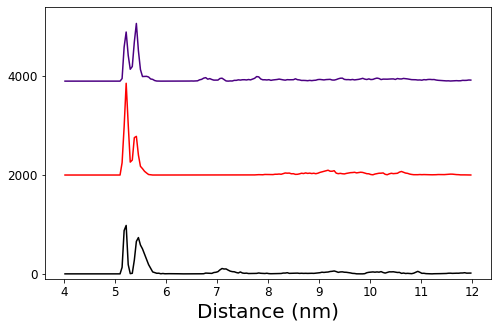

In [5]:
pos_arr0 = Wrap_data(data0,box_length)
pos_arr1 = Wrap_data(data1,box_length)
pos_arr2 = Wrap_data(data2,box_length)

box=freud.box.Box.from_box([box_length, box_length, box_length])

ax0,rdf0,counts0,prop0=plot_rdf(pos_arr0,'rdf',box)
ax1,rdf1,counts1,prop1=plot_rdf(pos_arr1,'rdf',box)
ax2,rdf2,counts2,prop2=plot_rdf(pos_arr2,'rdf',box)

offset1y=np.ones(len(getattr(rdf1, prop1)))
offset2y=np.ones(len(getattr(rdf2, prop2)))

fig,axs= plt.subplots(1,1,figsize=(8,5))
axs.plot(rdf0.bin_centers, counts0+offset2y*3900,c='indigo',label='Stringy')
axs.plot(rdf1.bin_centers, counts1+offset1y*2000,c='red',label='Aggregated')
axs.plot(rdf2.bin_centers, counts2+offset2y*0,c='k',label='Dispersed')

axs.set_xlabel('Distance (nm)',fontsize=20)
axs.tick_params(labelsize=12)
#axs.set_ylabel('Counts', fontsize=24)
axs.set_yticks(ticks=[0,2000,4000,6000])
axs.set_ylim([-100,5400])
#plt.tick_params(axis='y', which='both',bottom=False,top=False,labelbottom=False)
plt.show()


Use a noise filter to make the rdf clearer to read

This code doesn't work below yet.
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(np.linspace(0,20,1000).reshape(1000,),savitzky_golay(rdf.rdf,11,3))

In [6]:
index=2
scale=0.395
box_length=101.26605*scale
data0=XYZ_To_NParray(file_path + "1499538af491ce89bbfed0de287077ee/COG.xyz")*scale 


0.8144754494874975


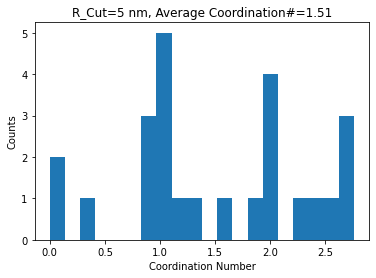

In [7]:
#Calculate the coordination number of all the particles in a single trajectory
#Use different read in values for data to take a look
r_cut=5.5
wrapped_data=Wrap_data(data0,box_length)
dis = Calc_Coordnum(wrapped_data,r_cut)
plt.hist(dis,bins=20)
plt.title('R_Cut=%1d nm, Average Coordination#=%1.2f' % (r_cut,np.average(dis)))
plt.xlabel('Coordination Number')
plt.ylabel('Counts')
print(np.std(dis))

# Section 3: Calculate Coord number for all simulations

In [8]:
#Calculate an array for the average coord_num of each simulation
#cut off distance used is 7 nm
coord_num=np.zeros((44))
file_names=[]
sim_num=0
r_cut=7.5
scale=0.395
std_arr=np.zeros((44))
with open ('file_list','r') as directories:
    directory_list=directories.readlines()
    for file in directory_list:
        dcdpath= file_path + file[0:-1] + 'assemble.dcd'
        if not path.exists(dcdpath):
            continue 
        file_names.append(file[0:-1])
        data=(XYZ_To_NParray(file_path + file[0:-1] + 'COG.xyz'))*scale
        neighbor_arr = Calc_Coordnum(Wrap_data(data,box_length),r_cut)
        coord_num[sim_num]=np.average(neighbor_arr)
        std_arr[sim_num]=np.std(neighbor_arr)
        sim_num+=1
        print('%1.2f done' % ((sim_num)/44))

0.02 done
0.05 done
0.07 done
0.09 done
0.11 done
0.14 done
0.16 done
0.18 done
0.20 done
0.23 done
0.25 done
0.27 done
0.30 done
0.32 done
0.34 done
0.36 done
0.39 done
0.41 done
0.43 done
0.45 done
0.48 done
0.50 done
0.52 done
0.55 done
0.57 done
0.59 done
0.61 done
0.64 done
0.66 done
0.68 done
0.70 done
0.73 done
0.75 done
0.77 done
0.80 done
0.82 done
0.84 done
0.86 done
0.89 done
0.91 done
0.93 done
0.95 done
0.98 done
1.00 done


Text(0, 0.5, 'Counts')

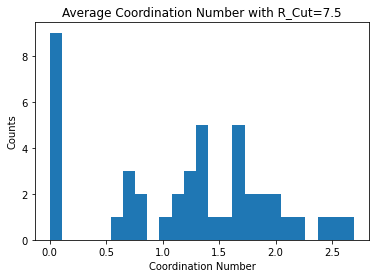

In [9]:
#Plot histogram of the coordination numbers for all simulations done
plt.hist(coord_num,bins=25)
plt.title('Average Coordination Number with R_Cut=' + str(r_cut))
plt.xlabel('Coordination Number')
plt.ylabel('Counts')

# Section 4: Read in Statepoints

In [10]:
sim_num=0
chainlength=np.zeros((44))
chaindensity=np.zeros((44))
fsa=np.zeros((44))
with open ('file_list','r') as directories:
    directory_list=directories.readlines()
    for file in directory_list:
        dcdpath= file_path + file[0:-1] + 'assemble.dcd'
        if not path.exists(dcdpath):
            continue 
        
        with open(file_path + file[0:-1] +"signac_statepoint.json","r") as file:
            statepoints = file.readlines()
            chainlength[sim_num]=int(statepoints[1][17:19])
            chaindensity[sim_num]=float(statepoints[2][19:22])
            fsa[sim_num]=float(statepoints[7][9:13])
            
        sim_num+=1
for index in np.arange(0,43,1):
    print(index,coord_num[index])
    print(file_names[index])
    print(fsa[index],chainlength[index],chaindensity[index],'\n')

0 1.996039603960396
1499538af491ce89bbfed0de287077ee/
0.65 18.0 4.0 

1 0.6835643564356437
14a2b8b463e21ae1954f5a1c617847e2/
0.55 30.0 3.0 

2 2.501386138613862
1bb21ced4538fec0a1744ab973600ca0/
0.55 18.0 2.5 

3 1.386138613861386
1bd06d14f87674a7d263b6ea42872fb9/
0.45 18.0 4.0 

4 0.6700990099009901
270c0867ad60b13942fa6ae00f91bf96/
0.45 24.0 3.5 

5 1.39009900990099
2786e7ea28a7e59e2e50ff5e580c7d3e/
0.55 21.0 4.5 

6 0.002376237623762376
2c8bf79a2c578f2bec76c078865b4132/
0.25 18.0 3.5 

7 1.9904950495049505
33c0d152f8ff745cc703b13fe4967842/
0.55 18.0 3.5 

8 1.4067326732673269
3688f57faae97574bce28b1c7ff935bd/
0.35 18.0 3.0 

9 0.7271287128712871
3719d43c55829a655347311220b2d273/
0.65 33.0 3.5 

10 1.3005940594059404
46d076c0ba37bdefdfa286d61e4aaa20/
0.35 18.0 3.5 

11 0.05465346534653466
4e58830be1dccdf9c2b856c589273904/
0.27 18.0 3.0 

12 0.039603960396039604
50576410dd0dfb272b45f35be32e0118/
0.35 18.0 4.5 

13 1.1405940594059405
5a3d11f1fd9ab9924c570969af138c29/
0.55 24.0 4.0 

14

In [11]:
df_single_np = pandas.read_csv('../Data/Single_Tether_Data.csv')
df_rg_asphere = pandas.read_csv('../Data/rg_asphere.csv')
#Normalise SASA values and rename the column fSASA
df_single_np["sasa"] = df_single_np["sasa"]/(4*np.pi*2.5**2)
df_single_np.rename(columns={'sasa':'fSASA'},inplace=True)

# Section 5: Determine Equilibrium Phases

In [12]:
# determine phase of each simulation based on below criteria
# Save phase as 0 for dispersed, 1 for stringy, and 2 for aggregated
phase=np.zeros((np.shape(coord_num)))
for i,coord in enumerate(coord_num):
    if coord<=1.0:
        phase[i]=0
    elif coord<=2.0 and std_arr[i]<=1.0:
        phase[i]=1
    else:
        phase[i]=2
print(phase)

[2. 0. 2. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 2. 2.
 1. 1. 1. 0. 1. 2. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 2. 1. 0.]


# Section 6: Save Statepoints with All Important Data to a csv
ID, Chain_length, Chain_density, fsa, coord num, coord std, sasa, phase, Gyration, Asphericity

In [26]:
dict = {'ID' : file_names,
       'Chain_length' : chainlength/3,
        'Chain_density' : chaindensity,
        'fsa' : fsa,
        'Coordination_number' : coord_num,
        'Standard_deviation' : std_arr,
        'Phase' : phase
       }
df_TNP_only = pandas.DataFrame(dict)

In [20]:
df_TNP_only

,ID,Chain_length,Chain_density,fsa,Coordination_number,Standard_deviation,Phase
0,1499538af491ce89bbfed0de287077ee/,6.0,4.0,0.65,1.996040,1.012073,2.0
1,14a2b8b463e21ae1954f5a1c617847e2/,10.0,3.0,0.55,0.683564,0.515616,0.0
2,1bb21ced4538fec0a1744ab973600ca0/,6.0,2.5,0.55,2.501386,1.321066,2.0
3,1bd06d14f87674a7d263b6ea42872fb9/,6.0,4.0,0.45,1.386139,0.652775,1.0
4,270c0867ad60b13942fa6ae00f91bf96/,8.0,3.5,0.45,0.670099,0.686022,0.0
5,2786e7ea28a7e59e2e50ff5e580c7d3e/,7.0,4.5,0.55,1.390099,0.676556,1.0
6,2c8bf79a2c578f2bec76c078865b4132/,6.0,3.5,0.25,0.002376,0.008058,0.0
7,33c0d152f8ff745cc703b13fe4967842/,6.0,3.5,0.55,1.990495,0.773594,1.0
8,3688f57faae97574bce28b1c7ff935bd/,6.0,3.0,0.35,1.406733,0.579579,1.0
9,3719d43c55829a655347311220b2d273/,11.0,3.5,0.65,0.727129,0.658612,0.0


In [21]:
#combine all the single particle information (sasa,gyration,asphericity) 
#and full system data (chainlength,chaindensity,fsa,phase) into one panda df
indices_arr= []
for i,j in enumerate(df_TNP_only['fsa']):
    indices_arr.append(np.where(
        np.all([df_TNP_only['fsa'][i] == np.round(df_single_np['fsa'].ravel(),
                                                                decimals=2), 
                df_TNP_only['Chain_density'][i] == np.round(df_single_np['chain_density'].ravel(),
                                                                decimals=2), 
                df_TNP_only['Chain_length'][i] == np.round(df_single_np['chainlength'].ravel(),
                                                                decimals=2)],
                axis=0))[0])

full_fsasa_arr=np.zeros(len(indices_arr))
full_chainrg_arr=np.zeros(len(indices_arr))
full_nprg_arr=np.zeros(len(indices_arr))
full_asphere_arr=np.zeros(len(indices_arr))
full_onlycrg_arr=np.zeros(len(indices_arr))
full_onlycasphere_arr=np.zeros(len(indices_arr))
for i,index in enumerate(indices_arr):    
    if index:
        full_fsasa_arr[i] = (np.take(df_single_np['fSASA'].ravel(), index, axis=0))
        full_chainrg_arr[i] = (np.take(df_rg_asphere['Graft_rg'].ravel(), index, axis=0))
        full_nprg_arr[i] = (np.take(df_rg_asphere['NP_rg'].ravel(), index, axis=0))
        full_asphere_arr[i] = (np.take(df_rg_asphere['Asphericity'].ravel(), index, axis=0))

/Users/calcraven/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


In [24]:
dict = {'ID' : file_names,
       'Chain Length' : chainlength/3,
        'Chain Density' : chaindensity,
        'FSA' : fsa,
        'Coordination_number' : coord_num,
        'Standard_deviation' : std_arr,
        'Phase' : phase,
        'fSASA' : full_fsasa_arr,
        'Chain Radius of Gyration' : full_chainrg_arr,
        'gNP Radius of Gyration' : full_nprg_arr,
        'Asphericity' : full_asphere_arr
       }
df = pandas.DataFrame(dict)
df.to_csv('../Data/Full_TNP_Dataset.csv')

In [25]:
df

,ID,Chain Length,Chain Density,FSA,Coordination_number,Standard_deviation,Phase,fSASA,Chain Radius of Gyration,gNP Radius of Gyration,Asphericity
0,1499538af491ce89bbfed0de287077ee/,6.0,4.0,0.65,1.996040,1.012073,2.0,0.221896,2.461474,0.293872,0.098198
1,14a2b8b463e21ae1954f5a1c617847e2/,10.0,3.0,0.55,0.683564,0.515616,0.0,0.106631,1.483445,0.231440,0.054226
2,1bb21ced4538fec0a1744ab973600ca0/,6.0,2.5,0.55,2.501386,1.321066,2.0,0.212349,2.127633,0.316644,0.074754
3,1bd06d14f87674a7d263b6ea42872fb9/,6.0,4.0,0.45,1.386139,0.652775,1.0,0.128035,2.688367,0.256063,0.061832
4,270c0867ad60b13942fa6ae00f91bf96/,8.0,3.5,0.45,0.670099,0.686022,0.0,0.096418,1.701846,0.232897,0.048291
5,2786e7ea28a7e59e2e50ff5e580c7d3e/,7.0,4.5,0.55,1.390099,0.676556,1.0,0.124021,2.180569,0.244966,0.067659
6,2c8bf79a2c578f2bec76c078865b4132/,6.0,3.5,0.25,0.002376,0.008058,0.0,0.056848,2.414382,0.244525,0.022002
7,33c0d152f8ff745cc703b13fe4967842/,6.0,3.5,0.55,1.990495,0.773594,1.0,0.184634,2.282502,0.280405,0.082432
8,3688f57faae97574bce28b1c7ff935bd/,6.0,3.0,0.35,1.406733,0.579579,1.0,0.111976,2.087083,0.263745,0.042142
9,3719d43c55829a655347311220b2d273/,11.0,3.5,0.65,0.727129,0.658612,0.0,0.120410,1.244242,0.226512,0.050709
